In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/patient_dataframe_clustered.csv')
df_diag = pd.read_csv('data/Translated diagnosis dimension table.csv')


Cluster sizes for cluster_labels_gmm_5:
cluster_labels_gmm_5
0    103063
1    153205
2     13985
3     34639
4     26870
Name: count, dtype: int64


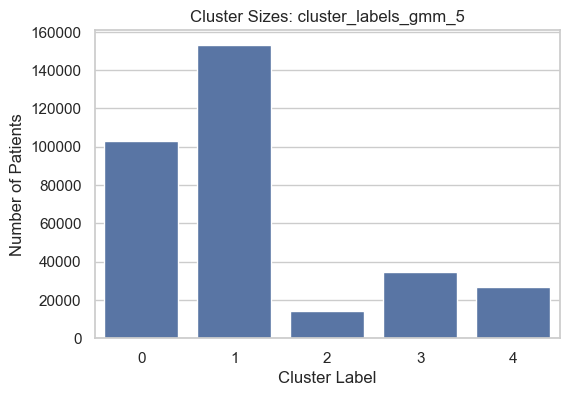


Cluster sizes for cluster_labels_gmm_4:
cluster_labels_gmm_4
0     46997
1     35996
2    232860
3     15909
Name: count, dtype: int64


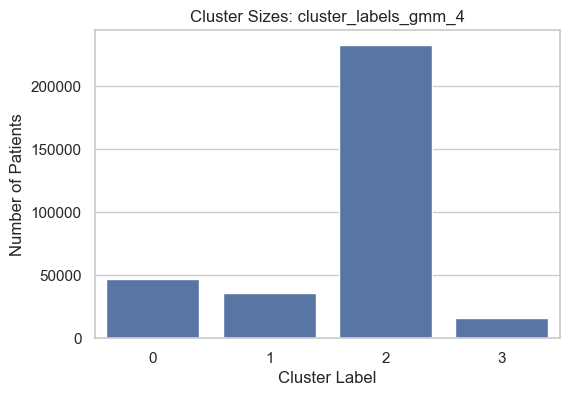


Cluster sizes for cluster_labels_kmeans:
cluster_labels_kmeans
0      8134
1     51942
2     21528
3    188668
4     61490
Name: count, dtype: int64


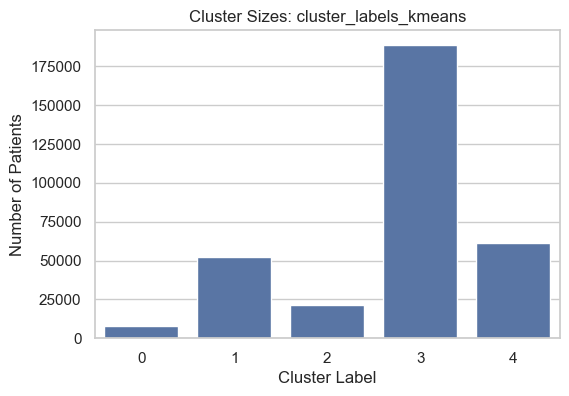

In [3]:
# cluster columns
cluster_columns = ['cluster_labels_gmm_5', 'cluster_labels_gmm_4', 'cluster_labels_kmeans']
sns.set(style="whitegrid")

for cluster_col in cluster_columns:
    cluster_counts = df[cluster_col].value_counts().sort_index()
    print(f"\nCluster sizes for {cluster_col}:")
    print(cluster_counts)
    plt.figure(figsize=(6,4))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
    plt.title(f'Cluster Sizes: {cluster_col}')
    plt.xlabel('Cluster Label')
    plt.ylabel('Number of Patients')
    plt.show()

In [4]:
# features to profile
profile_features = [
    'Age', 'Gender', 'numVisits', 'numProcedures', 'numContacts',
    'cumulativeVisitDuration', 
    'PhysicalAppointmentsRatio', 'HomeAppointmentsRatio', 'VirtualAppointmentsRatio',
    'AcuteRatio', 'PlannedRatio', 'RegularOutpatientRatio',
    'AcuteAmbulatoryRatio', 'UnderObservationRatio'
]

for cluster_col in cluster_columns:
    print(f"\n--- Profiling clusters for {cluster_col} ---\n")
    cluster_profile = df.groupby(cluster_col)[profile_features].agg(['mean', 'std'])
    display(cluster_profile)


--- Profiling clusters for cluster_labels_gmm_5 ---



Age               Gender            numVisits  \
                           mean        std      mean       std       mean   
cluster_labels_gmm_5                                                        
0                     51.038452  22.474734  0.462377  0.498585   5.207242   
1                     45.387548  26.700661  0.489377  0.499889   2.373852   
2                     46.942404  20.683074  0.430104  0.495108   3.932356   
3                     53.617326  23.955536  0.370594  0.482971  21.689281   
4                     54.121627  26.632550  0.469632  0.499086   4.262523   

                                numProcedures           numContacts  \
                            std          mean       std        mean   
cluster_labels_gmm_5                                                  
0                      4.094682      5.084851  3.895796    5.209678   
1                      2.067854      3.527522  2.645079    2.374172   
2                      4.027278      4.748731  3.946302    4.110476   
3                     14.056675     12.879471  7.011312   22.729063   
4                      2.526352      6.358392  3.552788    6.414254   

                                 ... AcuteRatio           PlannedRatio  \
                            std  ...       mean       std         mean   
cluster_labels_gmm_5             ...                                     
0                      4.101051  ...   0.001248  0.011300     0.998752   
1                      2.068978  ...   0.000565  0.008445     0.999435   
2                      4.448362  ...   0.609416  0.350029     0.390584   
3                     14.564568  ...   0.028602  0.059875     0.971398   
4                      3.583700  ...   0.014597  0.077831     0.985403   

                               RegularOutpatientRatio            \
                           std                   mean       std   
cluster_labels_gmm_5                                              
0                     0.011300               0.999871  0.003397   
1                     0.008445               0.999979  0.001545   
2                     0.350029               0.999574  0.015103   
3                     0.059875               0.966318  0.059291   
4                     0.077831               0.626647  0.199111   

                     AcuteAmbulatoryRatio           UnderObservationRatio  \
                                     mean       std                  mean   
cluster_labels_gmm_5                                                        
0                            8.820730e-07  0.000283              0.000128   
1                            0.000000e+00  0.000000              0.000021   
2                            2.788702e-04  0.014423              0.000147   
3                            1.046508e-05  0.001090              0.033671   
4                            2.263987e-04  0.012420              0.373126   

                                
                           std  
cluster_labels_gmm_5            
0                     0.003385  
1                     0.001545  
2                     0.004490  
3                     0.059280  
4                     0.199138  

[5 rows x 28 columns]


--- Profiling clusters for cluster_labels_gmm_4 ---



Age               Gender            numVisits  \
                           mean        std      mean       std       mean   
cluster_labels_gmm_4                                                        
0                     53.832728  22.992794  0.437113  0.496035  13.152116   
1                     54.972218  25.706000  0.472719  0.499262   5.843622   
2                     47.037755  25.515849  0.474573  0.499354   3.884897   
3                     45.244526  20.043416  0.379156  0.485192   5.537054   

                                numProcedures           numContacts  \
                            std          mean       std        mean   
cluster_labels_gmm_4                                                  
0                     16.144114      7.166968  8.090897   13.437773   
1                      4.429443      7.270391  4.323594    7.913824   
2                      3.801897      4.522129  3.413638    3.889801   
3                      6.148472      6.055252  5.548676    6.010937   

                                 ... AcuteRatio           PlannedRatio  \
                            std  ...       mean       std         mean   
cluster_labels_gmm_4             ...                                     
0                     16.771610  ...   0.006646  0.027270     0.993354   
1                      5.346805  ...   0.014752  0.054923     0.985248   
2                      3.816429  ...   0.001208  0.010936     0.998792   
3                      6.989288  ...   0.565487  0.353112     0.434513   

                               RegularOutpatientRatio            \
                           std                   mean       std   
cluster_labels_gmm_4                                              
0                     0.027270               0.996061  0.016326   
1                     0.054923               0.695014  0.211108   
2                     0.010936               0.999812  0.003626   
3                     0.353112               0.999114  0.022127   

                     AcuteAmbulatoryRatio           UnderObservationRatio  \
                                     mean       std                  mean   
cluster_labels_gmm_4                                                        
0                                0.000000  0.000000              0.003939   
1                                0.000000  0.000000              0.304986   
2                                0.000000  0.000000              0.000188   
3                                0.000656  0.021124              0.000230   

                                
                           std  
cluster_labels_gmm_4            
0                     0.016326  
1                     0.211108  
2                     0.003626  
3                     0.005911  

[4 rows x 28 columns]


--- Profiling clusters for cluster_labels_kmeans ---



Age               Gender            numVisits  \
                            mean        std      mean       std       mean   
cluster_labels_kmeans                                                        
0                      48.058037  21.193715  0.514015  0.499834   1.446890   
1                      51.716424  23.724342  0.361403  0.480412  17.428786   
2                      55.260351  27.086001  0.476774  0.499472   3.748839   
3                      45.870884  26.091902  0.486977  0.499832   2.992728   
4                      53.026380  21.689783  0.471719  0.499204   4.208668   

                                 numProcedures           numContacts  \
                             std          mean       std        mean   
cluster_labels_kmeans                                                  
0                       1.121016      2.544627  1.770675    1.495451   
1                      13.042970     11.721670  6.474385   18.144065   
2                       2.275177      5.827527  3.144132    5.946674   
3                       2.730537      4.120667  3.117310    3.047104   
4                       4.116360      3.503805  2.813385    4.233111   

                                  ... AcuteRatio           PlannedRatio  \
                             std  ...       mean       std         mean   
cluster_labels_kmeans             ...                                     
0                       1.547928  ...   0.870715  0.215505     0.129285   
1                      13.632461  ...   0.030149  0.070161     0.969851   
2                       3.445552  ...   0.006677  0.055374     0.993323   
3                       2.853370  ...   0.006622  0.040435     0.993378   
4                       4.150459  ...   0.001292  0.018619     0.998708   

                                RegularOutpatientRatio            \
                            std                   mean       std   
cluster_labels_kmeans                                              
0                      0.215505               0.998787  0.024414   
1                      0.070161               0.979987  0.049402   
2                      0.055374               0.575114  0.185459   
3                      0.040435               0.995218  0.030005   
4                      0.018619               0.998004  0.019271   

                      AcuteAmbulatoryRatio           UnderObservationRatio  \
                                      mean       std                  mean   
cluster_labels_kmeans                                                        
0                                 0.000430  0.018383              0.000783   
1                                 0.000023  0.002484              0.019990   
2                                 0.000213  0.012863              0.424673   
3                                 0.000002  0.000767              0.004780   
4                                 0.000014  0.002423              0.001982   

                                 
                            std  
cluster_labels_kmeans            
0                      0.016086  
1                      0.049343  
2                      0.185487  
3                      0.029995  
4                      0.019120  

[5 rows x 28 columns]

## Cluster Summaries

### GMM - 5 Clusters
| Cluster | Description |
|:-------:|:------------|
| 1 | 45 years avg age, lowest number of contacts and visits → relatively healthier or lower-complexity patients. |
| 3 | 53 years avg, very high number of visits (21 on average) → heavy users of the system. |
| 2 | 46 years avg, high AcuteRatio (60%) → emergency-driven cluster (urgent care). |
| 4 | 54 years avg, slightly high UnderObservationRatio (37%) → patients needing observation stays after procedures. |
| 0 | 51 years avg, low AcuteRatio → very planned, regular patien##ts. |

## GMM - 4 Clusters
| Cluster | Description |
|:-------:|:------------|
| 2 | 47 years avg, huge cluster, very low AcuteRatio → mostly stable, planned patients. |
| 3 | 45 years avg, highest AcuteRatio (56%) → emergency cluster. |
| 1 | 54 years avg, high UnderObservationRatio (30%) → frail/elderly observed patients. |
| 0 | 53 years avg, high number of visits (13 visits) → heavy u##sers group. |

## KMeans Clusters
| Cluster | Description |
|:-------:|:------------|
| 1 | 51 years avg, very high number of visits (17 visits) → heavy users. |
| 2 | 55 years avg, high UnderObservationRatio (42%) → fragile/complex elderly. |
| 0 | 48 years avg, ultra high AcuteRatio (87%) → emergency-only cluster. |
| 3 | 45 years avg, few visits, mostly planned → stable, low usage. |
| 4 | 53 years avg, regular outpatient. |



--- Boxplots for cluster_labels_gmm_5 ---



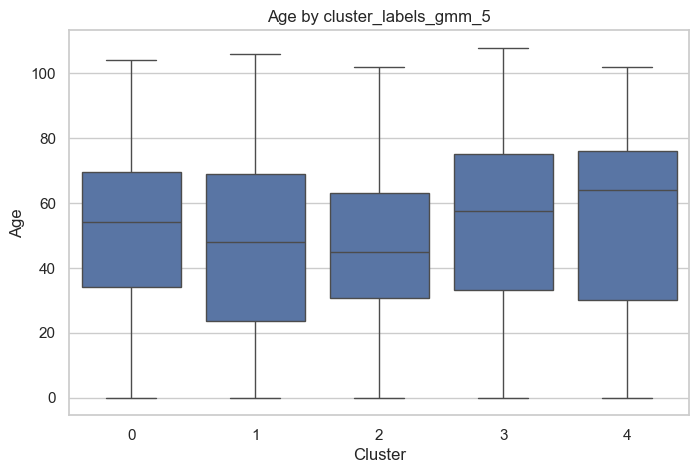

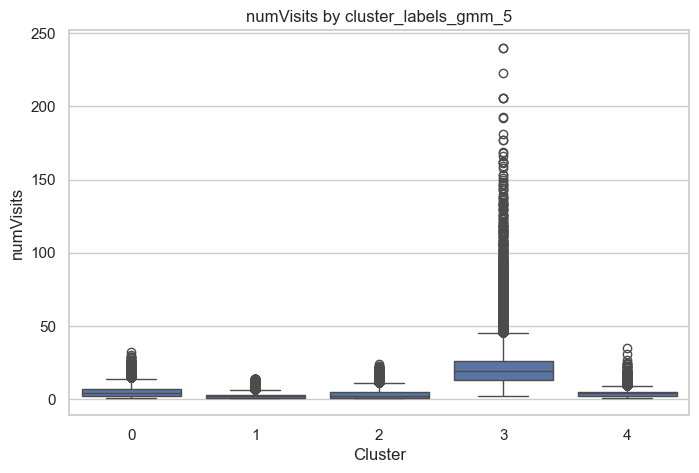

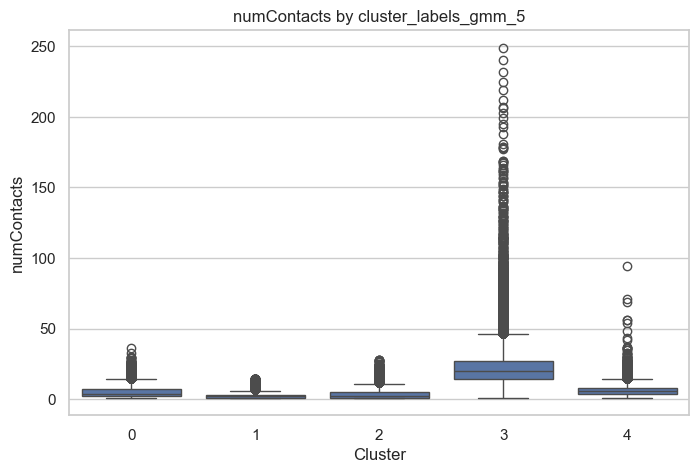

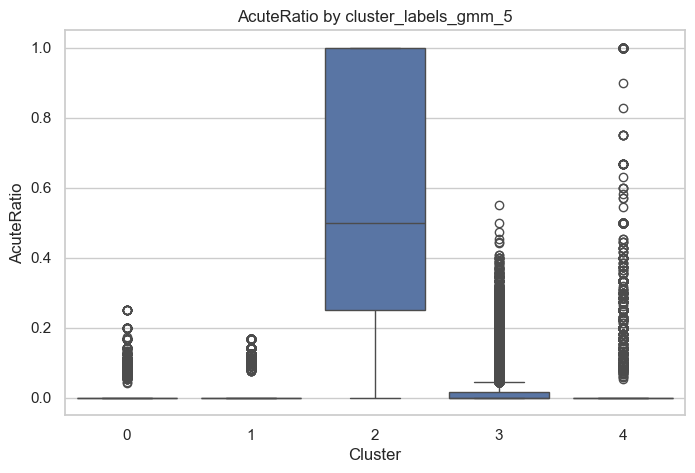

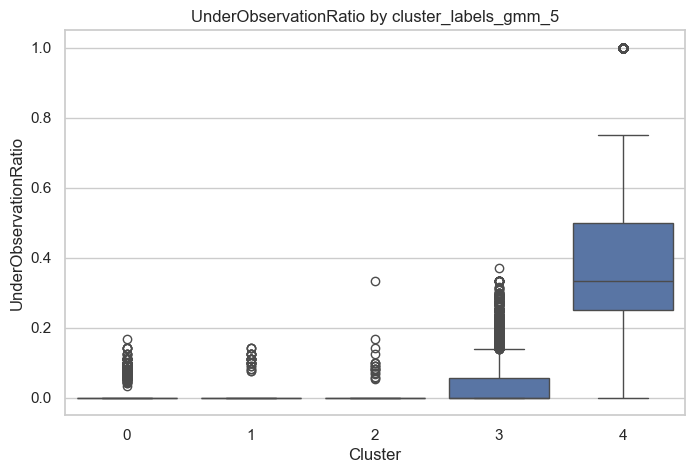


--- Boxplots for cluster_labels_gmm_4 ---



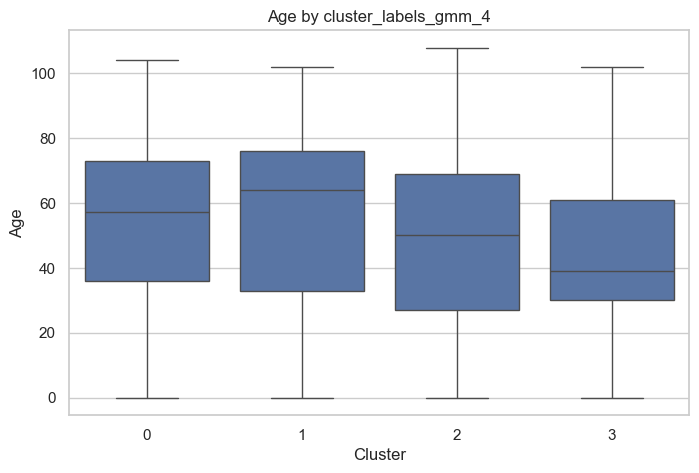

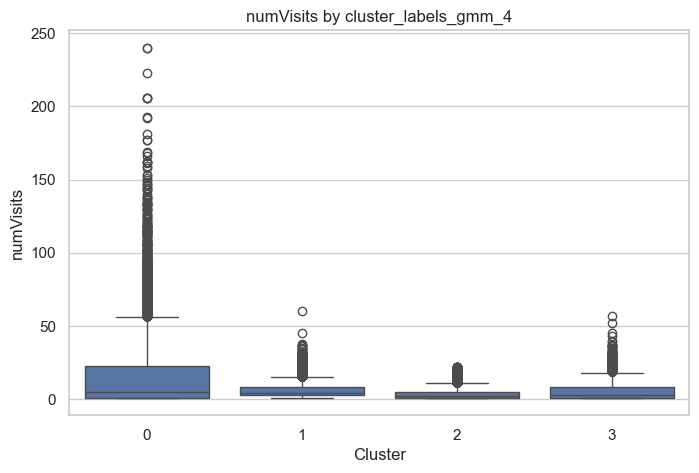

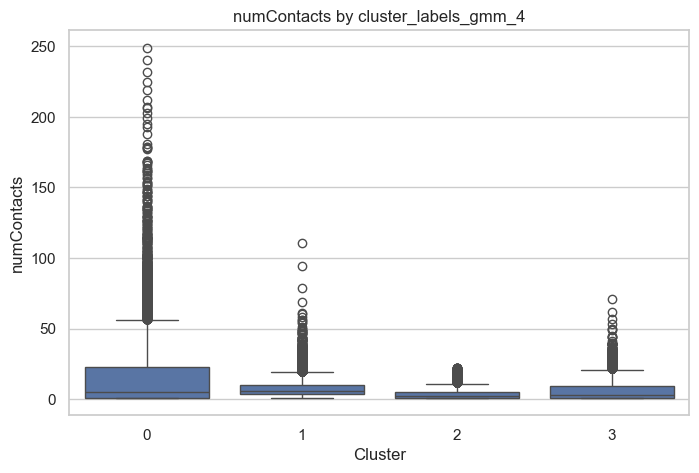

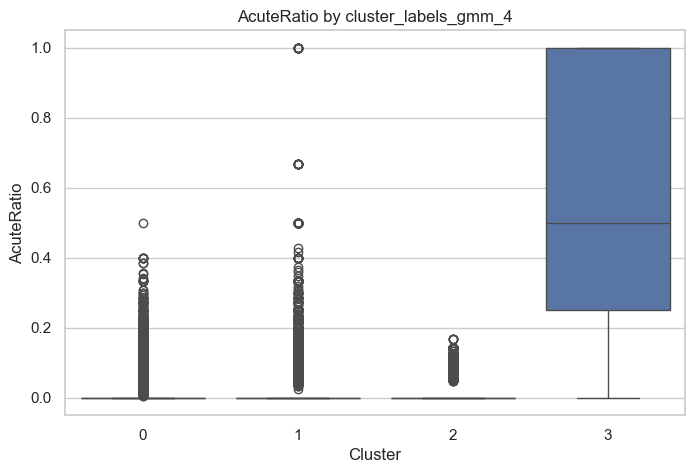

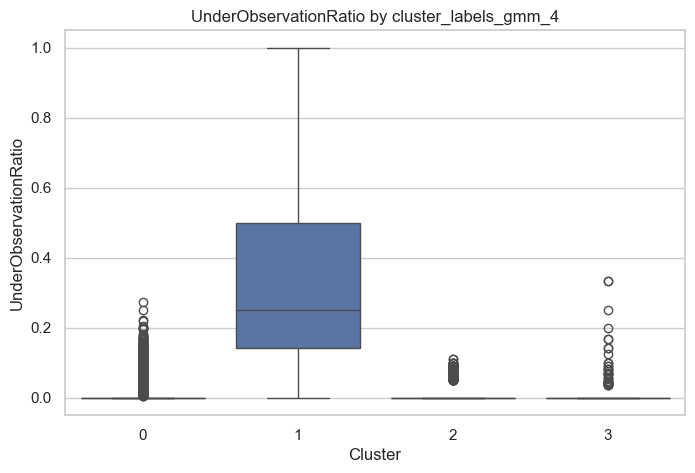


--- Boxplots for cluster_labels_kmeans ---



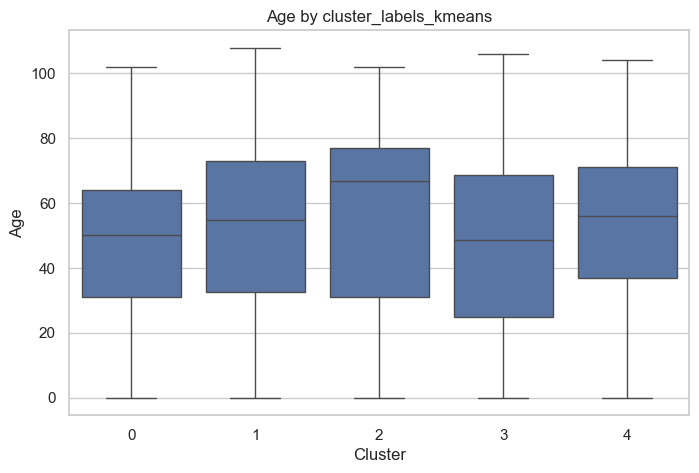

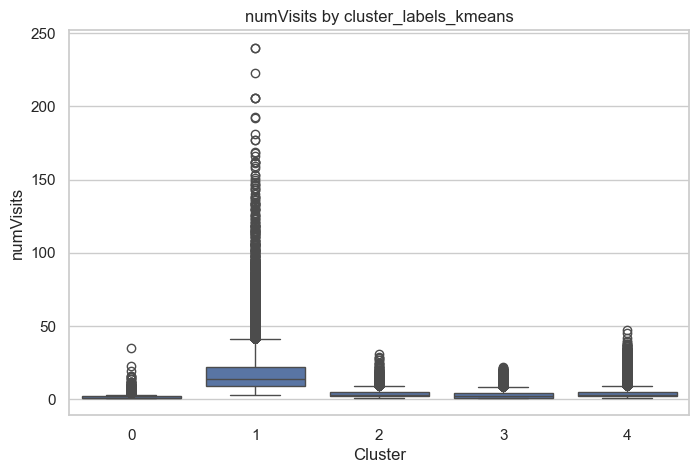

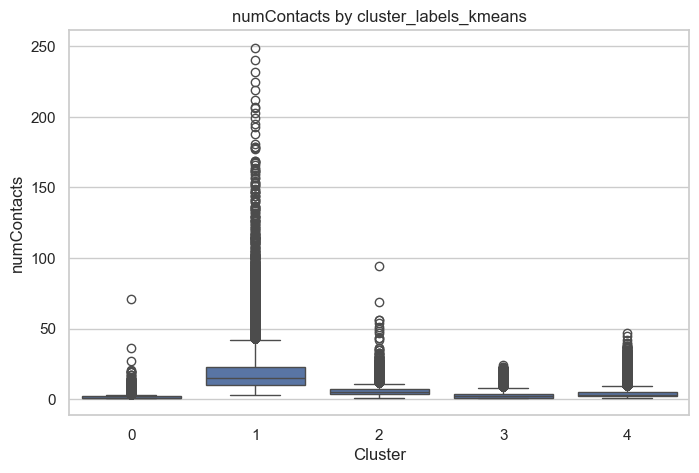

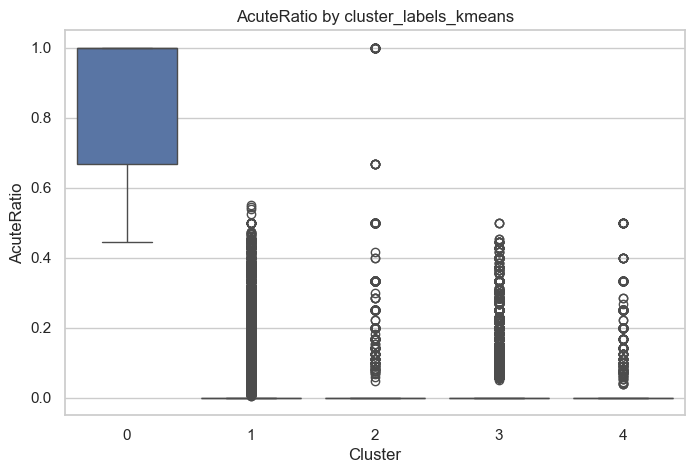

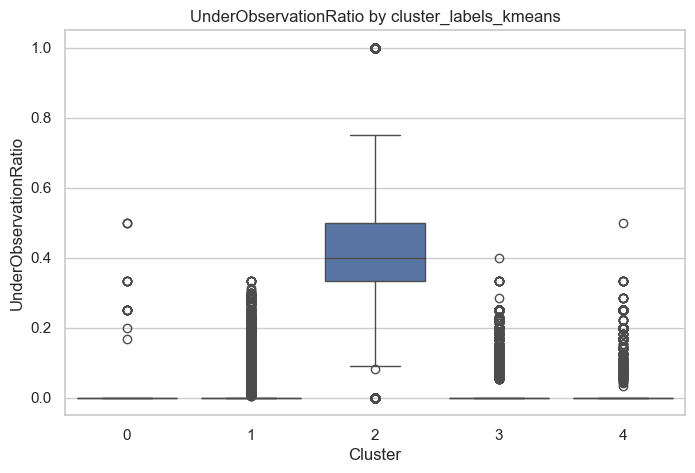

In [5]:
plot_features = ['Age', 'numVisits', 'numContacts', 'AcuteRatio', 'UnderObservationRatio']
for cluster_col in cluster_columns:
    print(f"\n--- Boxplots for {cluster_col} ---\n")
    
    for feature in plot_features:
        plt.figure(figsize=(8,5))
        sns.boxplot(x=cluster_col, y=feature, data=df)
        plt.title(f'{feature} by {cluster_col}')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
        plt.show()


### Cluster Profiling – Conclusions

From the boxplots, several patterns can be observed across the different clustering methods:

- **Age distribution:** 
  - All clustering methods show some minor variations in age between clusters.
  - In general, older patients tend to belong to clusters with more contacts and possibly more complex care needs.

- **Number of Visits and Contacts:**
  - Some clusters clearly have a much higher number of visits and contacts compared to others.
  - For example, in `gmm_5`, Cluster 3 has significantly higher visit counts, indicating "heavy users" of the healthcare system.

- **AcuteRatio:**
  - Certain clusters are dominated by acute (emergency) visits.
    - In `gmm_5`, Cluster 2 has a much higher AcuteRatio.
    - In `gmm_4`, Cluster 3 similarly shows a high AcuteRatio.
    - In `kmeans`, Cluster 0 is almost purely acute (near 90% acute visits).

- **UnderObservationRatio:**
  - Some clusters (e.g., Cluster 4 in `gmm_5`, Cluster 1 in `gmm_4`, Cluster 2 in `kmeans`) show higher UnderObservationRatios.
  - This might correspond to more fragile or complex patients requiring observation after care.

### General Interpretation:
- All clustering methods seem to capture certain important healthcare usage patterns:
  - "Heavy users" with many visits.
  - "Acute/emergency patients."
  - "Observation-dependent or complex-care patients."
- There is some redundancy between the clustering methods: the patterns of heavy usage, acute care, and observation appear consistently, but the sh-Visits, Regular Outpatient').


## Diagnosis analysis

In [6]:
df_diag_exploded = df.copy()
def parse_diagnosis_list(diagnosis_str):
    diagnosis_str = diagnosis_str.strip("{}")  # remove curly braces
    if diagnosis_str == "":
        return []  # empty list if no diagnosis
    return [d.strip().strip("'").strip('"') for d in diagnosis_str.split(",")]
df_diag_exploded['Diagnosis'] = df_diag_exploded['Diagnosis'].apply(parse_diagnosis_list)
df_diag_exploded = df_diag_exploded.explode('Diagnosis')
df_diag = pd.read_csv('data/Translated diagnosis dimension table.csv')  # reload if needed
df_diag_exploded = df_diag_exploded.merge(df_diag[['Diagnosis', 'Disease Name']], 
                                          left_on='Diagnosis', 
                                          right_on='Diagnosis', 
                                          how='left')
print(df_diag_exploded[['patientID', 'Diagnosis', 'Disease Name']].head())

  patientID Diagnosis                              Disease Name
0  Z4115614     DZ001  Contact mhp. Planned general child study
1  Z4115614     DQ549                            Hyphospadi Uns
2  Z4115614     DQ540                  Hypospadi on gloss penis
3  Z4119225     DZ001  Contact mhp. Planned general child study
4  Z4127033     DZ001  Contact mhp. Planned general child study


#### cluster_labels_gmm_5


Top diagnoses for cluster_labels_gmm_5 - Cluster 0
Observation due to suspicion of apoplexy: 8956 patients (8.69%)
Seropositive Rheumatoid Artritis UNS: 2388 patients (2.32%)
Hearing loss Uns: 1943 patients (1.89%)
Spinal stenosis: 1893 patients (1.84%)
Observation due to suspicion of nervous system disease: 1701 patients (1.65%)
Contact mhp. examination of ears or hearing: 1649 patients (1.60%)
Focal epilepsy with complex seizures or generalized tonic-clonic seizures (GTCS): 1639 patients (1.59%)
Varicer in lower extremity without ulcer and eczema: 1623 patients (1.57%)
Prostate cancer: 1556 patients (1.51%)
Other spondylosis with radiculopathy: 1521 patients (1.48%)


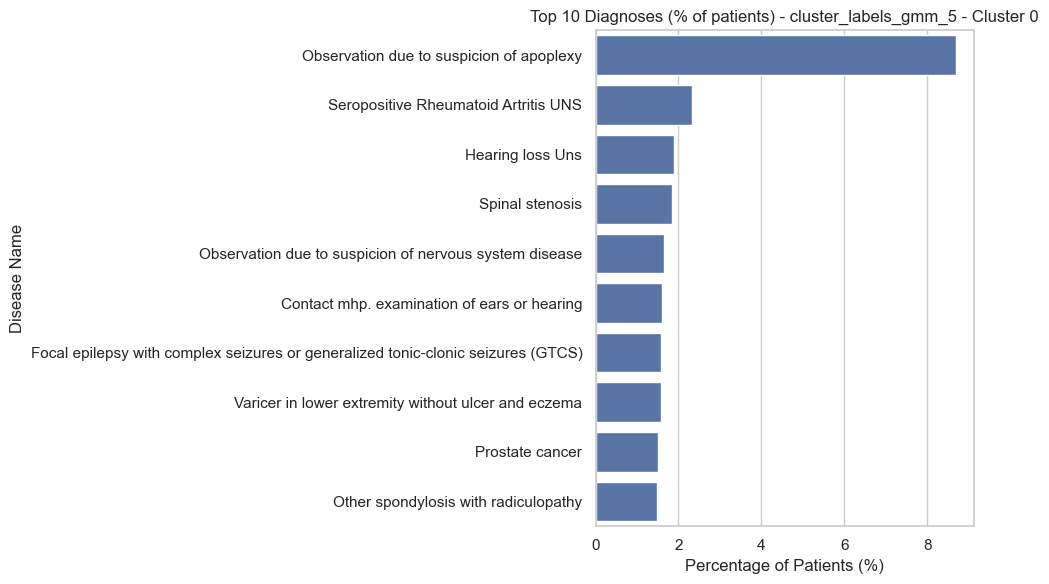


Top diagnoses for cluster_labels_gmm_5 - Cluster 1
Hearing loss Uns: 9765 patients (6.37%)
Contact mhp. Planned general child study: 5898 patients (3.85%)
Post -star: 3616 patients (2.36%)
Observation due to suspicion of nervous system disease: 3575 patients (2.33%)
Contact mhp. examination of ears or hearing: 2941 patients (1.92%)
Fast test subject: 2550 patients (1.66%)
Age -related cataract (> = 50 years) Uns: 2406 patients (1.57%)
Aplasia of tooth: 2000 patients (1.31%)
Pregnancy, first -time birth: 1837 patients (1.20%)
Condition with Cardioverter-Defibrillator (ICD): 1795 patients (1.17%)


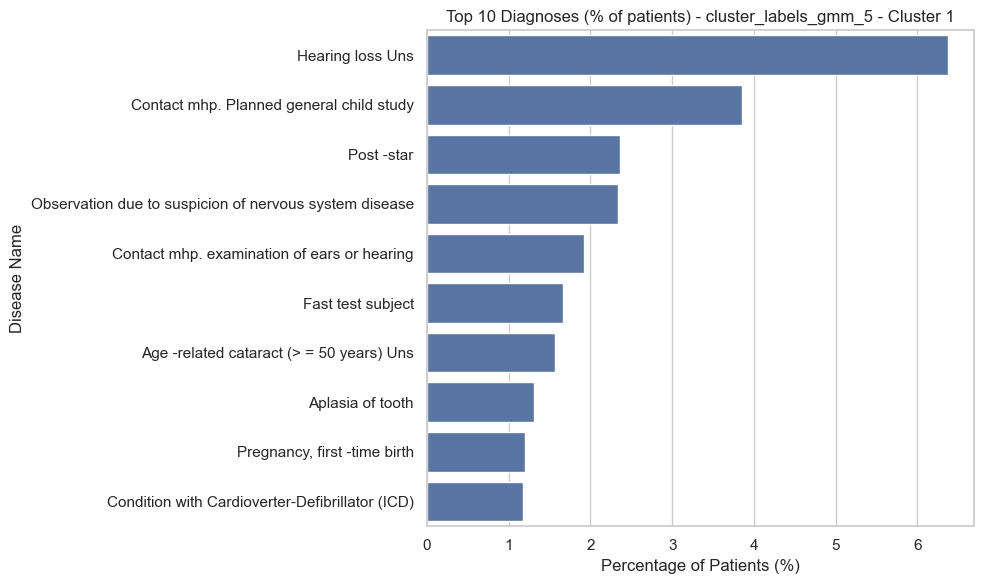


Top diagnoses for cluster_labels_gmm_5 - Cluster 2
Pregnancy, first -time birth: 1824 patients (13.04%)
Routine examination after birth: 1721 patients (12.31%)
Pregnancy, multiple -born: 1125 patients (8.04%)
Rupture of retina without solution: 845 patients (6.04%)
Contact mhp. Examination of eyes or sight: 801 patients (5.73%)
Keratitis Uns: 753 patients (5.38%)
Foreign body in Cornea: 497 patients (3.55%)
Abrasio at Cornea Without Foreign Body: 490 patients (3.50%)
Recution resolution with rupture: 472 patients (3.38%)
Acute and subacute anterior uveitis: 455 patients (3.25%)


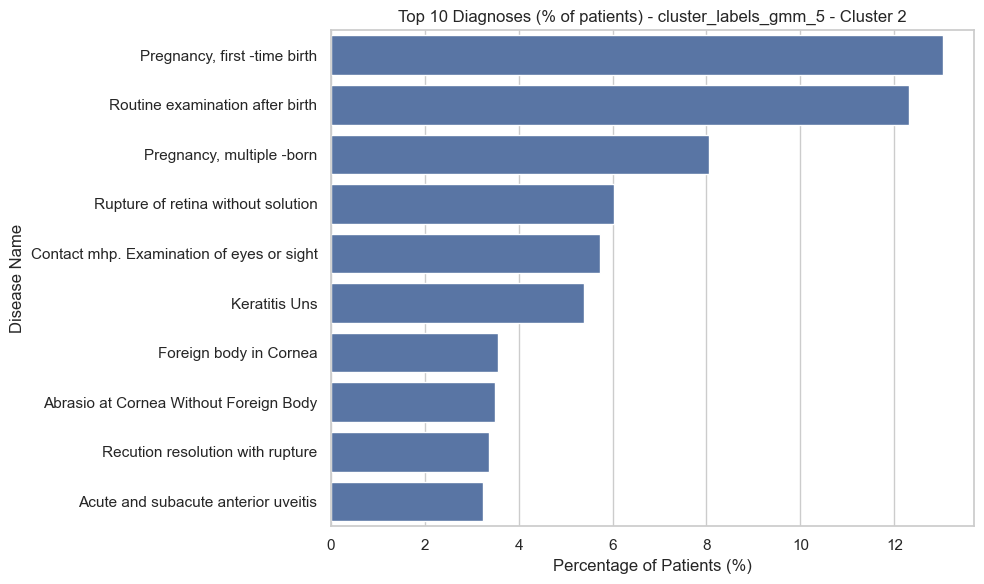


Top diagnoses for cluster_labels_gmm_5 - Cluster 3
Routine examination after birth: 3893 patients (11.24%)
Age -related cataract (> = 50 years) Uns: 3884 patients (11.21%)
Pregnancy, first -time birth: 3400 patients (9.82%)
Wet age -related macular degeneration with subretinal carny formation: 3256 patients (9.40%)
Pregnancy, multiple -born: 2639 patients (7.62%)
Contact mhp. examination of ears or hearing: 1546 patients (4.46%)
Contact mhp. Examination of eyes or sight: 1507 patients (4.35%)
Hearing loss Uns: 1469 patients (4.24%)
Seropositive Rheumatoid Artritis UNS: 1218 patients (3.52%)
Degeneratio Maculae Luteae a Polus Posterior Retinae: 1077 patients (3.11%)


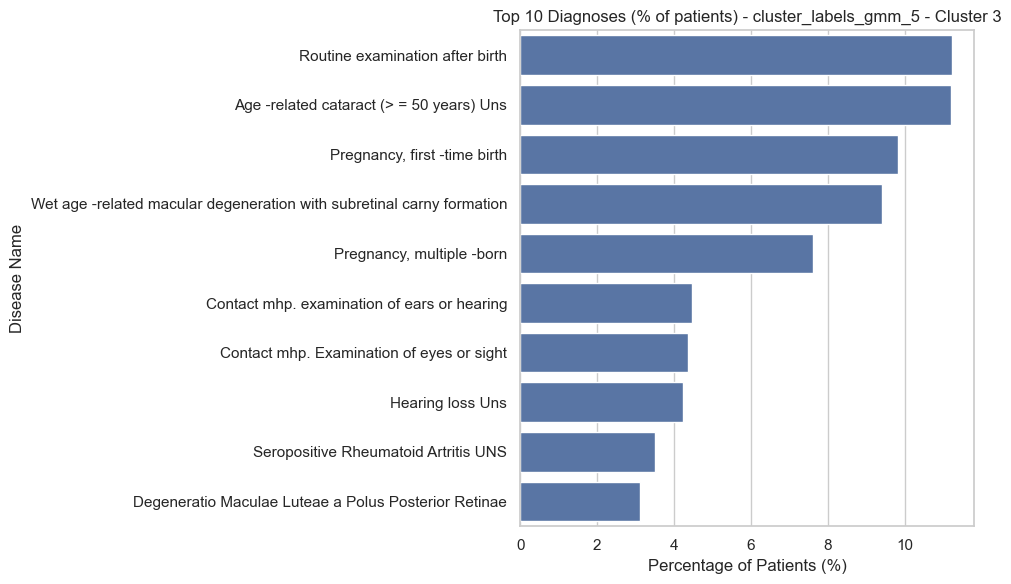


Top diagnoses for cluster_labels_gmm_5 - Cluster 4
Age -related cataract (> = 50 years) Uns: 11741 patients (43.70%)
Nasal septum deviation: 701 patients (2.61%)
Contact mhp. examination of ears or hearing: 609 patients (2.27%)
Post -star: 543 patients (2.02%)
Chronic tonsillitis: 499 patients (1.86%)
Pregnancy, first -time birth: 454 patients (1.69%)
Hearing loss Uns: 419 patients (1.56%)
Benign tumor in skin on the eyelid: 401 patients (1.49%)
Phimosis: 379 patients (1.41%)
Epiretinal fibrosis: 359 patients (1.34%)


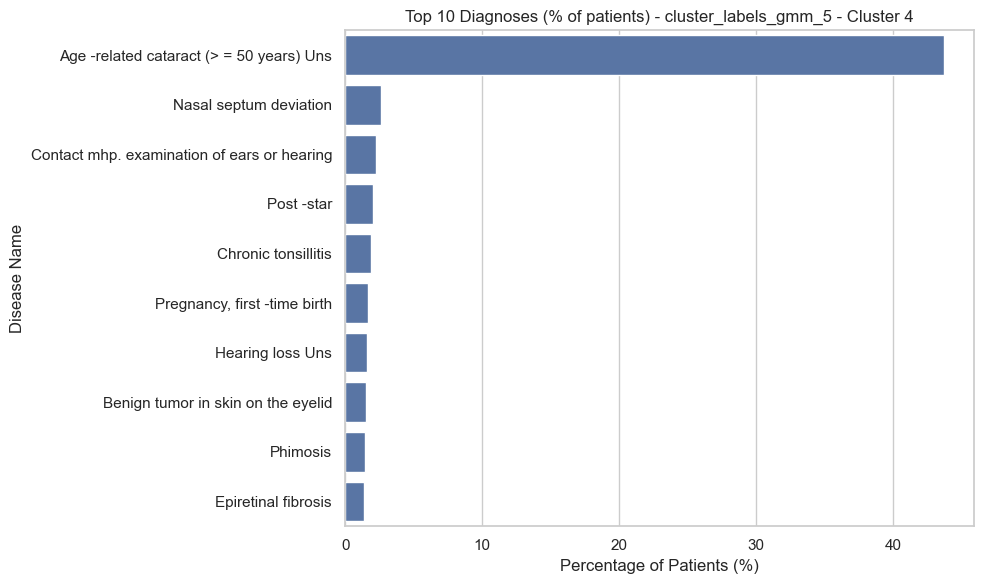

In [7]:
selected_cluster_col = 'cluster_labels_gmm_5'  # you can change to gmm_4 or kmeans
clusters = df_diag_exploded[selected_cluster_col].dropna().unique()
clusters = sorted(clusters)
for cluster in clusters:
    df_cluster = df_diag_exploded[df_diag_exploded[selected_cluster_col] == cluster]
    total = df_cluster['patientID'].nunique()  # number of unique patients
    top_diagnoses = df_cluster['Disease Name'].value_counts().head(10)
    top_diagnoses_percent = (top_diagnoses / total) * 100
    print(f"\nTop diagnoses for {selected_cluster_col} - Cluster {cluster}")
    for diag, count in top_diagnoses.items():
        print(f"{diag}: {count} patients ({top_diagnoses_percent[diag]:.2f}%)")
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_diagnoses_percent.values, y=top_diagnoses.index)
    plt.title(f'Top 10 Diagnoses (% of patients) - {selected_cluster_col} - Cluster {cluster}')
    plt.xlabel('Percentage of Patients (%)')
    plt.ylabel('Disease Name')
    plt.tight_layout()
    plt.show()

#### cluster_labels_gmm_4


Top diagnoses for cluster_labels_gmm_4 - Cluster 0
Observation due to suspicion of apoplexy: 7363 patients (15.67%)
Routine examination after birth: 1871 patients (3.98%)
Wet age -related macular degeneration with subretinal carny formation: 1861 patients (3.96%)
Pregnancy, first -time birth: 1719 patients (3.66%)
Pregnancy, multiple -born: 1323 patients (2.82%)
Age -related cataract (> = 50 years) Uns: 1278 patients (2.72%)
Seropositive Rheumatoid Artritis UNS: 1226 patients (2.61%)
Contact mhp. examination of ears or hearing: 1032 patients (2.20%)
Focal epilepsy with complex seizures or generalized tonic-clonic seizures (GTCS): 1032 patients (2.20%)
Contact mhp. Examination of eyes or sight: 949 patients (2.02%)


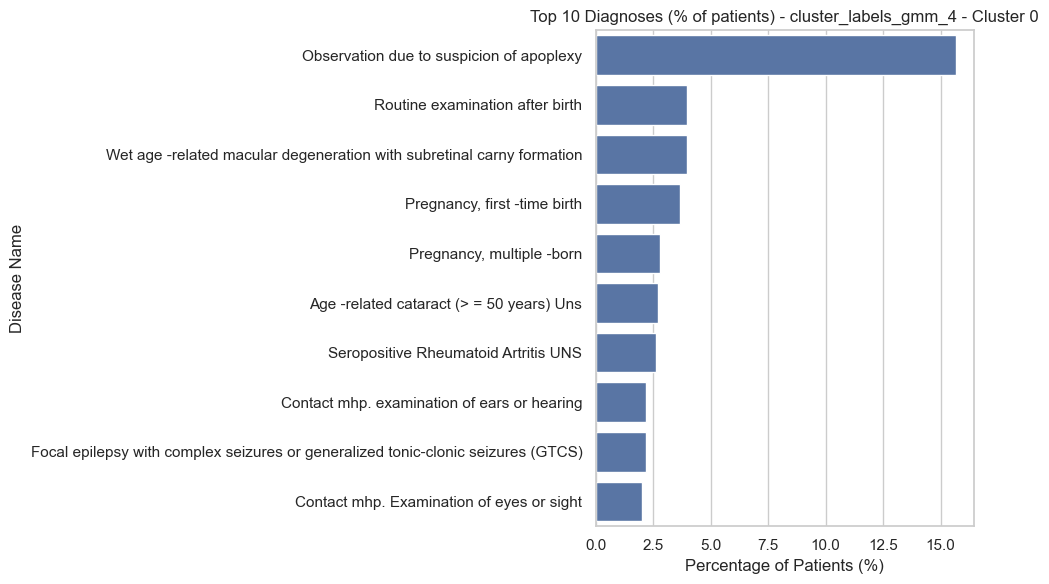


Top diagnoses for cluster_labels_gmm_4 - Cluster 1
Age -related cataract (> = 50 years) Uns: 14070 patients (39.09%)
Contact mhp. examination of ears or hearing: 1142 patients (3.17%)
Post -star: 915 patients (2.54%)
Hearing loss Uns: 879 patients (2.44%)
Nasal septum deviation: 765 patients (2.13%)
Pregnancy, first -time birth: 636 patients (1.77%)
Contact mhp. Examination of eyes or sight: 610 patients (1.69%)
Routine examination after birth: 589 patients (1.64%)
Chronic tonsillitis: 523 patients (1.45%)
Recution resolution with rupture: 499 patients (1.39%)


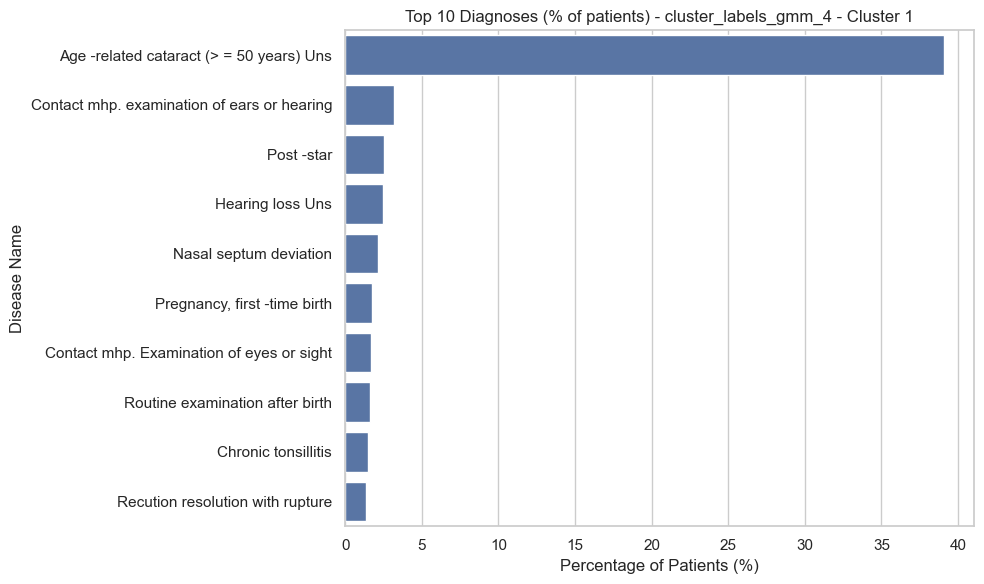


Top diagnoses for cluster_labels_gmm_4 - Cluster 2
Hearing loss Uns: 11832 patients (5.08%)
Contact mhp. Planned general child study: 6473 patients (2.78%)
Observation due to suspicion of nervous system disease: 5169 patients (2.22%)
Contact mhp. examination of ears or hearing: 4571 patients (1.96%)
Post -star: 4399 patients (1.89%)
Pregnancy, first -time birth: 3290 patients (1.41%)
Age -related cataract (> = 50 years) Uns: 3254 patients (1.40%)
Pregnancy, multiple -born: 3199 patients (1.37%)
Wet age -related macular degeneration with subretinal carny formation: 3084 patients (1.32%)
Fast test subject: 3078 patients (1.32%)


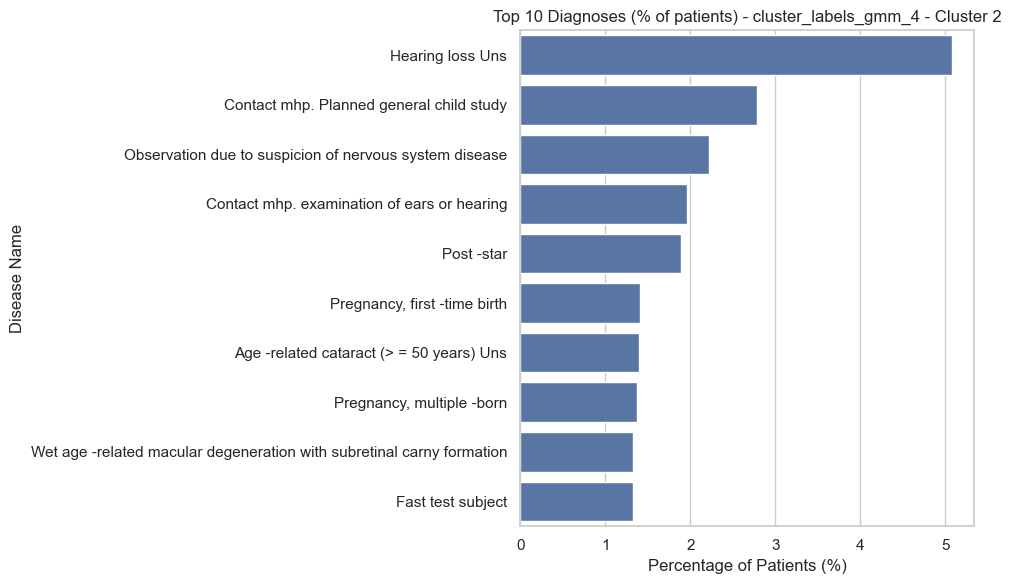


Top diagnoses for cluster_labels_gmm_4 - Cluster 3
Pregnancy, first -time birth: 3018 patients (18.97%)
Routine examination after birth: 2946 patients (18.52%)
Pregnancy, multiple -born: 1848 patients (11.62%)
Rupture of retina without solution: 851 patients (5.35%)
Contact mhp. Examination of eyes or sight: 814 patients (5.12%)
Keratitis Uns: 770 patients (4.84%)
Foreign body in Cornea: 497 patients (3.12%)
Abrasio at Cornea Without Foreign Body: 492 patients (3.09%)
Recution resolution with rupture: 489 patients (3.07%)
Acute and subacute anterior uveitis: 468 patients (2.94%)


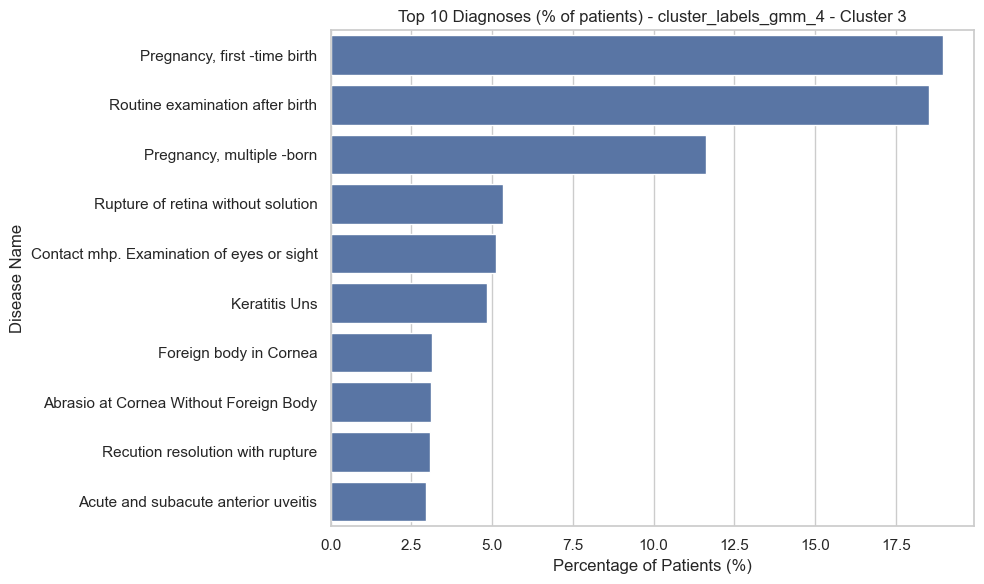

In [8]:
selected_cluster_col = 'cluster_labels_gmm_4'
clusters = df_diag_exploded[selected_cluster_col].dropna().unique()
clusters = sorted(clusters)
for cluster in clusters:
    df_cluster = df_diag_exploded[df_diag_exploded[selected_cluster_col] == cluster]
    total = df_cluster['patientID'].nunique()  # number of unique patients
    top_diagnoses = df_cluster['Disease Name'].value_counts().head(10)
    top_diagnoses_percent = (top_diagnoses / total) * 100
    print(f"\nTop diagnoses for {selected_cluster_col} - Cluster {cluster}")
    for diag, count in top_diagnoses.items():
        print(f"{diag}: {count} patients ({top_diagnoses_percent[diag]:.2f}%)")
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_diagnoses_percent.values, y=top_diagnoses.index)
    plt.title(f'Top 10 Diagnoses (% of patients) - {selected_cluster_col} - Cluster {cluster}')
    plt.xlabel('Percentage of Patients (%)')
    plt.ylabel('Disease Name')
    plt.tight_layout()
    plt.show()

#### cluster_labels_kmeans


Top diagnoses for cluster_labels_kmeans - Cluster 0
Rupture of retina without solution: 698 patients (8.58%)
Contact mhp. Examination of eyes or sight: 581 patients (7.14%)
Keratitis Uns: 551 patients (6.77%)
Foreign body in Cornea: 466 patients (5.73%)
Abrasio at Cornea Without Foreign Body: 434 patients (5.34%)
Degeneratio Corporis Vitrei: 314 patients (3.86%)
Acute and subacute anterior uveitis: 301 patients (3.70%)
Visual Disorder Uns: 235 patients (2.89%)
Pregnancy, first -time birth: 212 patients (2.61%)
Conjunctivitis Uns: 204 patients (2.51%)


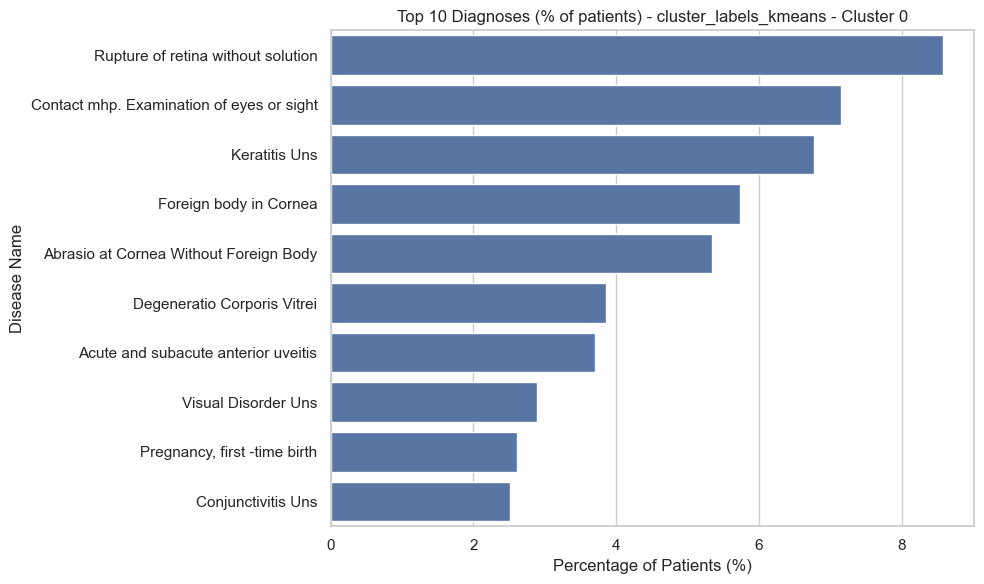


Top diagnoses for cluster_labels_kmeans - Cluster 1
Routine examination after birth: 6412 patients (12.34%)
Pregnancy, first -time birth: 4929 patients (9.49%)
Pregnancy, multiple -born: 4237 patients (8.16%)
Age -related cataract (> = 50 years) Uns: 3855 patients (7.42%)
Wet age -related macular degeneration with subretinal carny formation: 3257 patients (6.27%)
Hearing loss Uns: 2507 patients (4.83%)
Contact mhp. examination of ears or hearing: 2455 patients (4.73%)
Contact mhp. Examination of eyes or sight: 2286 patients (4.40%)
Observation due to suspicion of apoplexy: 1618 patients (3.12%)
Seropositive Rheumatoid Artritis UNS: 1571 patients (3.02%)


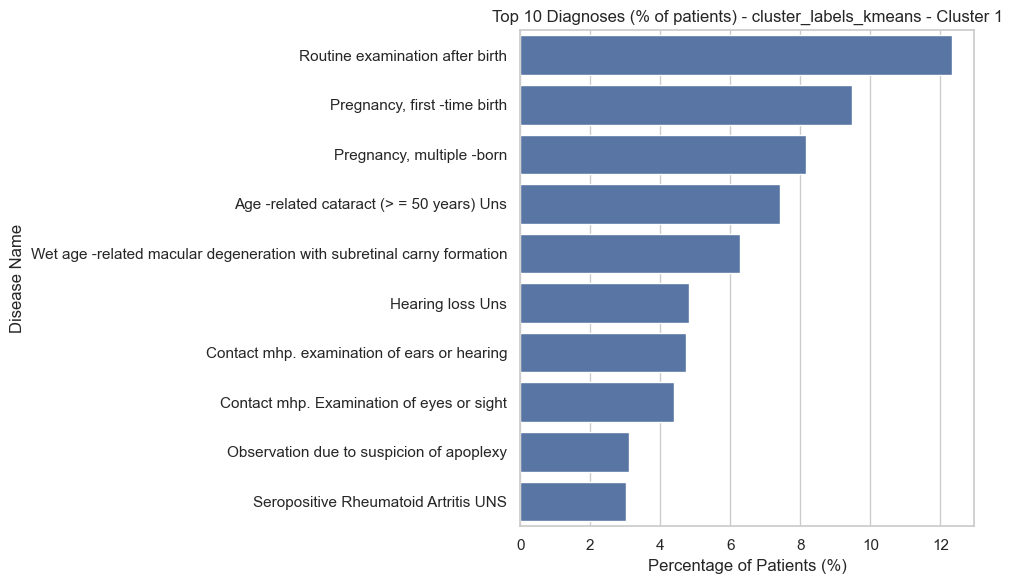


Top diagnoses for cluster_labels_kmeans - Cluster 2
Age -related cataract (> = 50 years) Uns: 10354 patients (48.10%)
Nasal septum deviation: 583 patients (2.71%)
Chronic tonsillitis: 481 patients (2.23%)
Post -star: 398 patients (1.85%)
Phimosis: 368 patients (1.71%)
Benign tumor in skin on the eyelid: 351 patients (1.63%)
Contact mhp. examination of ears or hearing: 314 patients (1.46%)
Epiretinal fibrosis: 296 patients (1.37%)
Single -sided testicular retention: 293 patients (1.36%)
Ingvinal hernie uns without ileus or gangrene: 259 patients (1.20%)


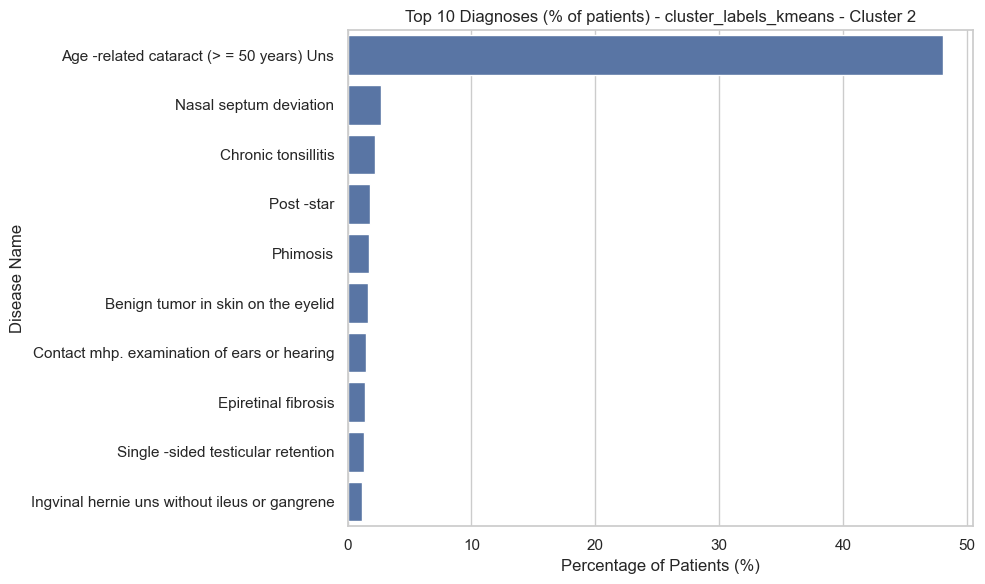


Top diagnoses for cluster_labels_kmeans - Cluster 3
Hearing loss Uns: 10683 patients (5.66%)
Contact mhp. Planned general child study: 6473 patients (3.43%)
Age -related cataract (> = 50 years) Uns: 4010 patients (2.13%)
Observation due to suspicion of nervous system disease: 3988 patients (2.11%)
Post -star: 3949 patients (2.09%)
Contact mhp. examination of ears or hearing: 3869 patients (2.05%)
Pregnancy, first -time birth: 3339 patients (1.77%)
Fast test subject: 2746 patients (1.46%)
Contact mhp. Examination of eyes or sight: 2204 patients (1.17%)
Aplasia of tooth: 2158 patients (1.14%)


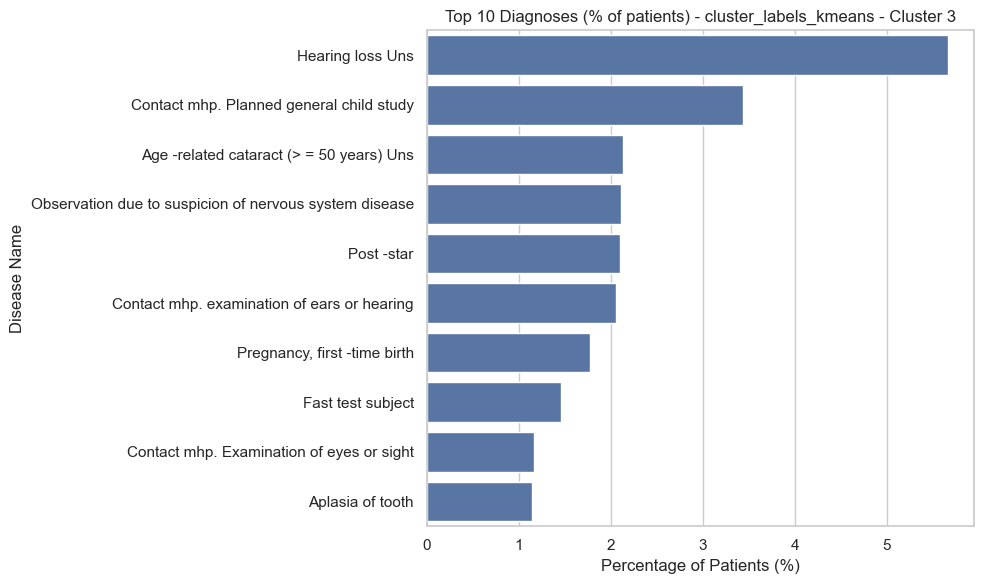


Top diagnoses for cluster_labels_kmeans - Cluster 4
Observation due to suspicion of apoplexy: 8040 patients (13.08%)
Seropositive Rheumatoid Artritis UNS: 1451 patients (2.36%)
Focal epilepsy with complex seizures or generalized tonic-clonic seizures (GTCS): 1384 patients (2.25%)
Brain infarction Uns: 1206 patients (1.96%)
Varicer in lower extremity without ulcer and eczema: 1007 patients (1.64%)
Prostate cancer: 920 patients (1.50%)
Chronic respiratory insufficiency: 873 patients (1.42%)
Epilepsy UNS: 831 patients (1.35%)
Spinal stenosis: 803 patients (1.31%)
Observation due to suspected other illness or condition: 785 patients (1.28%)


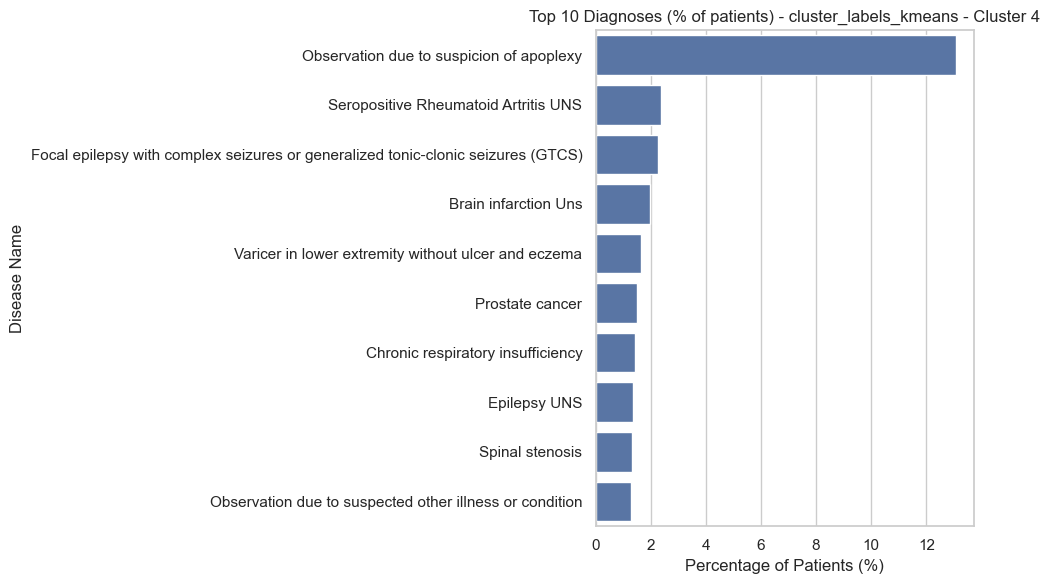

In [9]:
selected_cluster_col = 'cluster_labels_kmeans' 
clusters = df_diag_exploded[selected_cluster_col].dropna().unique()
clusters = sorted(clusters)
for cluster in clusters:
    df_cluster = df_diag_exploded[df_diag_exploded[selected_cluster_col] == cluster]
    total = df_cluster['patientID'].nunique()  # number of unique patients
    top_diagnoses = df_cluster['Disease Name'].value_counts().head(10)
    top_diagnoses_percent = (top_diagnoses / total) * 100
    print(f"\nTop diagnoses for {selected_cluster_col} - Cluster {cluster}")
    for diag, count in top_diagnoses.items():
        print(f"{diag}: {count} patients ({top_diagnoses_percent[diag]:.2f}%)")
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_diagnoses_percent.values, y=top_diagnoses.index)
    plt.title(f'Top 10 Diagnoses (% of patients) - {selected_cluster_col} - Cluster {cluster}')
    plt.xlabel('Percentage of Patients (%)')
    plt.ylabel('Disease Name')
    plt.tight_layout()
    plt.show()

## Diagnosis Profiles per Cluster – Conclusions

### Clustering Method: G5rs

- **Cluster 0**: Dominated by neurological conditions (e.g., suspicion of apoplexy, spinal stenosis, epilepsy). Likely older and frail patients.
- **Cluster 1**: Mixed cluster with elderly hearing loss, general child studies, and post-operative control. Covers both elderly and pediatric patients.
- **Cluster 2**: Very clearly focused on pregnancy and birth-related care (pregnancy, multiple births, routine examinations). Young women dominate this cluster.
- **Cluster 3**: Mixed elderly (eye diseases: cataracts, macular degeneration) and birth-related care (pregnancy). A combination of older and younger patients.
- **Cluster 4**: Dominated by age-related cataracts (43%+). Mostly elderly patients with eye diseases and minor ENT problems (nasal deviations, tonsils).

---

### Clustering4M 4 Clusters

- **Cluster 0**: Neurological observations (apoplexy suspicion) and elderly eye diseases (macular degeneration, cataracts) dominate.
- **Cluster 1**: Strong dominance of age-related cataracts (39%). Mainly elderly patients with vision issues and ENT problems.
- **Cluster 2**: Very mixed cluster, with a combination of hearing loss, nervous system observations, pregnancies, and post-operative monitoring. Broad population.
- **Cluster 3**: Clear pregnancy/birth cluster. High rates of routine newborn exams, first-time births, and multiple pregnancies. Younger, female pats dominate.

---

### Clusod: KMeans 5 Clusters

- **Cluster 0**: Primarily eye trauma and infections (retinal rupture, keratitis, corneal abrasions). Emergency-type eye conditions.
- **Cluster 1**: Pregnancies, births, newborns, and eye diseases (cataracts, macular degeneration). Combination of maternal care and elderly eye patients.
- **Cluster 2**: Dominated by age-related cataracts (48%) with some ENT conditions. Very clear elderly group.
- **Cluster 3**: Very mixed cluster: hearing loss, child studies, general follow-ups. Broader, less defined population.
- **Cluster 4**: Neurological conditions dominate (apoplexy suspicion, epilepsy, brain infarctions). Likely frail,plex elderly patients.

---

## Comparative Insights Across Clustering Methods

- **GMM5** offers good separation between pregnancy/birth-related care, elderly eye patients, and neurological cases.
- **GMM4** creates a very large general-purpose cluster (Cluster 2), which is a bit too broad. Good separation of pregnancy cases, though.
- **KMeans** tends to create clusters that are slightly more specialized (e.g., eye emergencies, neurological frailty), but also creates a very mixed cluster (Cluster 3).

### Overall Impression:
- **GMM5** seems to produce the clearest, most medically meaningful clusters.
- **KMeans** identifies some strong patterns but mixes populations more.
- **GMM4** captures pregnancy groups well but leaves one very broad cluster which might be less actionable.
er which might be less actionable.

---
er which might be less actionable.

---


## Appointment Behavior Analysis

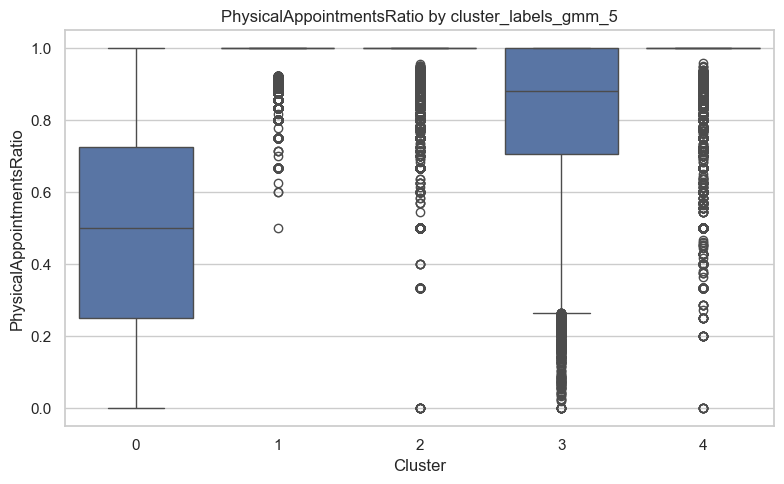

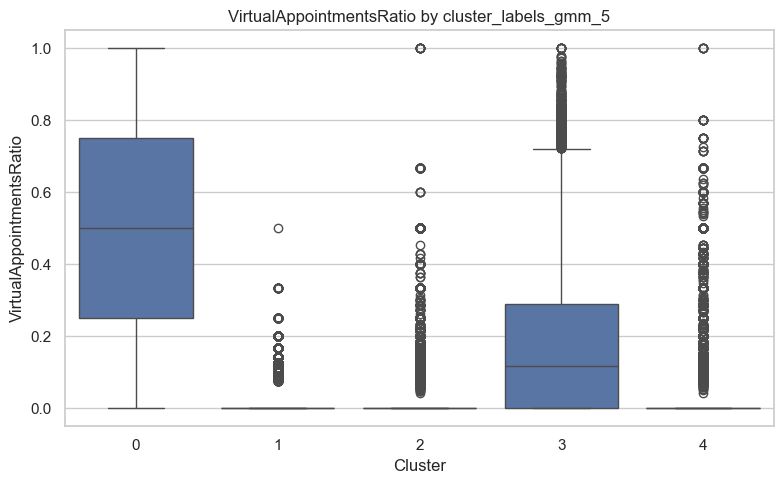

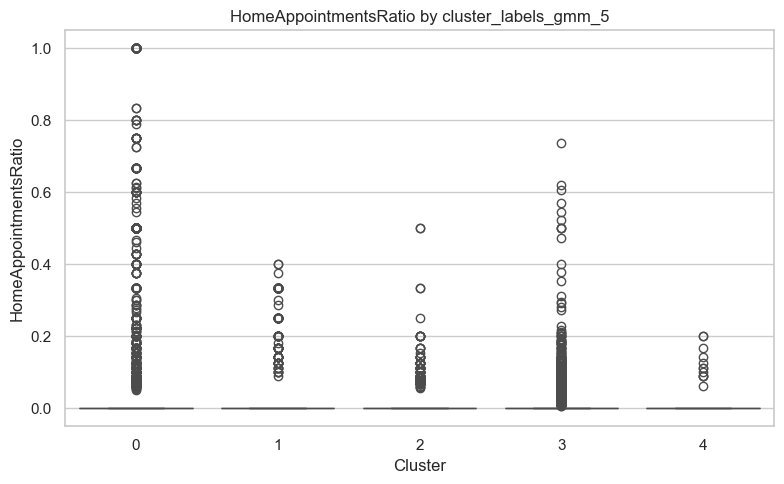

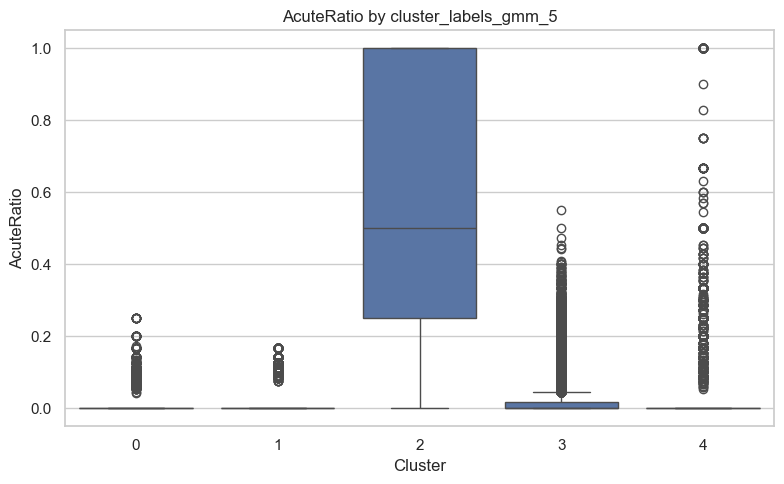

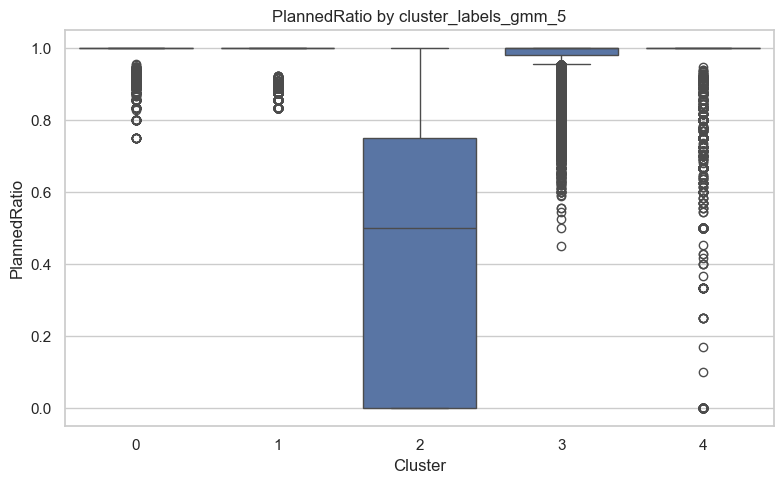

In [11]:
selected_cluster_col = 'cluster_labels_gmm_5'
appointment_features = ['PhysicalAppointmentsRatio', 'VirtualAppointmentsRatio', 'HomeAppointmentsRatio', 'AcuteRatio', 'PlannedRatio']
for feature in appointment_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=selected_cluster_col, y=feature, data=df)
    plt.title(f'{feature} by {selected_cluster_col}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

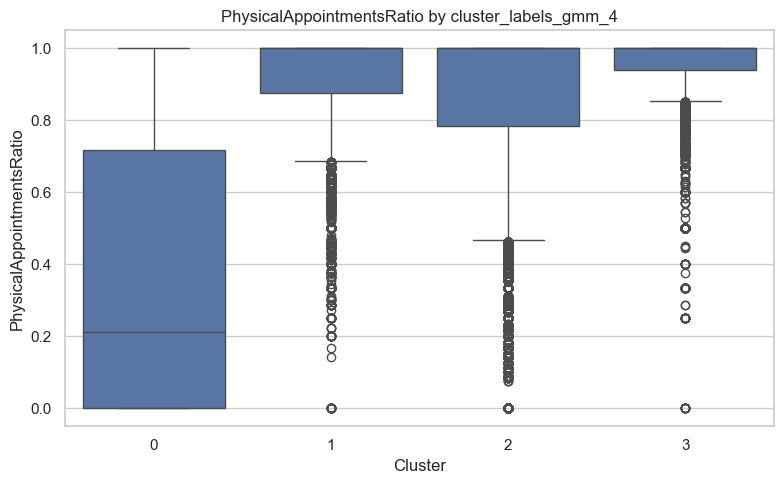

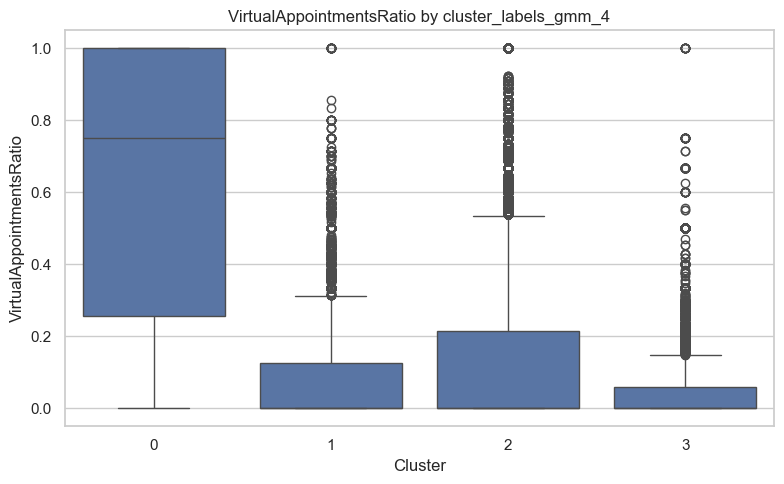

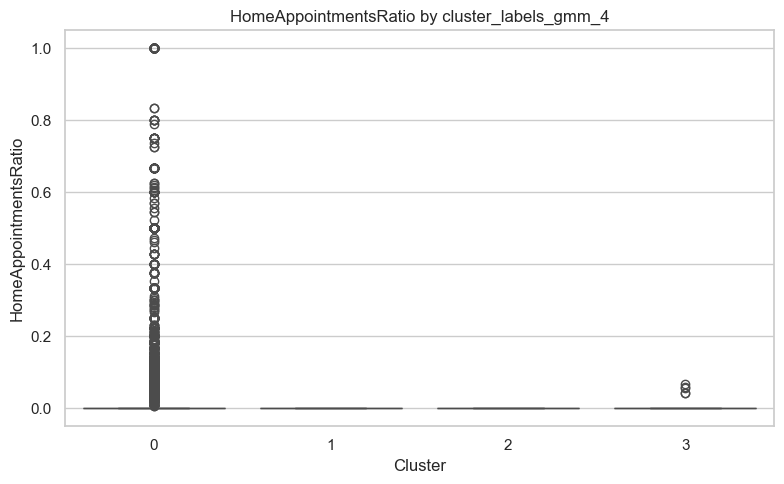

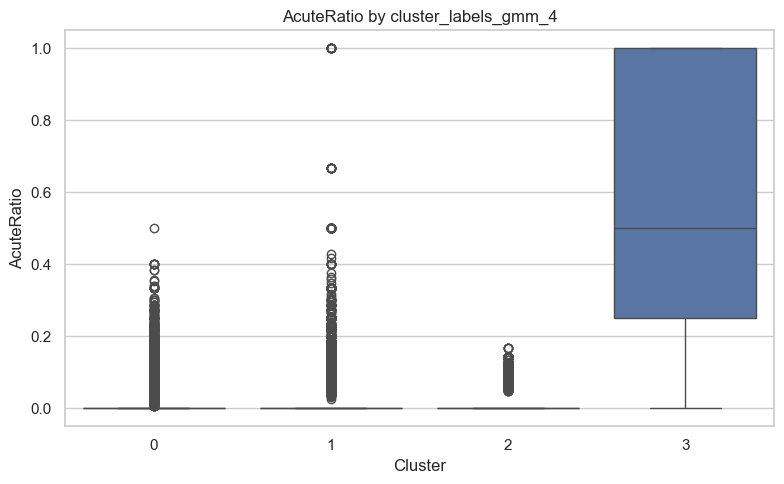

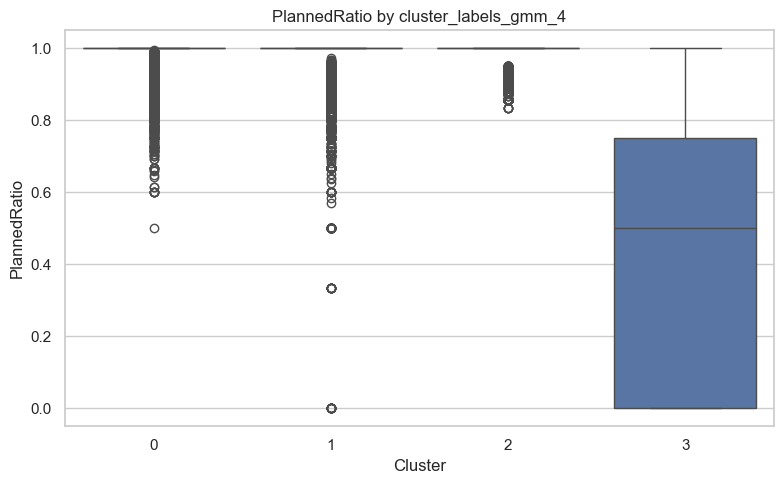

In [12]:
selected_cluster_col = 'cluster_labels_gmm_4'
appointment_features = ['PhysicalAppointmentsRatio', 'VirtualAppointmentsRatio', 'HomeAppointmentsRatio', 'AcuteRatio', 'PlannedRatio']
for feature in appointment_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=selected_cluster_col, y=feature, data=df)
    plt.title(f'{feature} by {selected_cluster_col}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

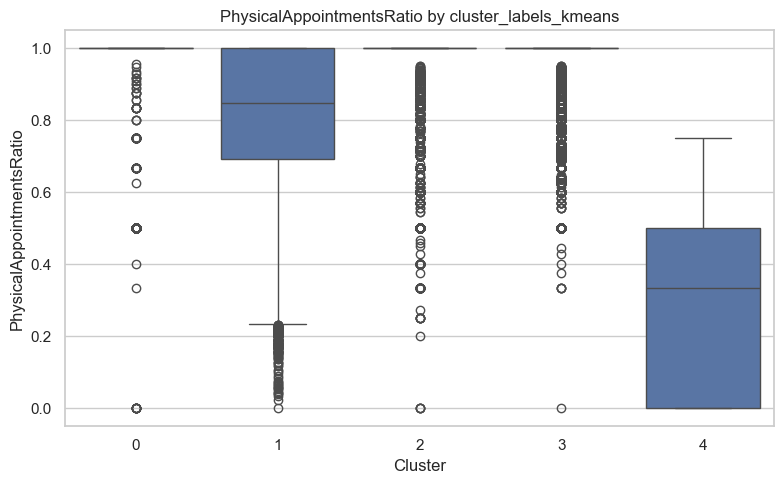

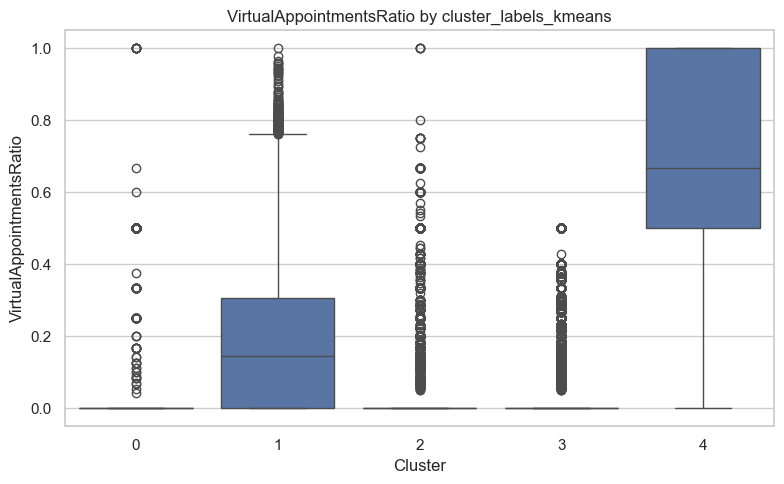

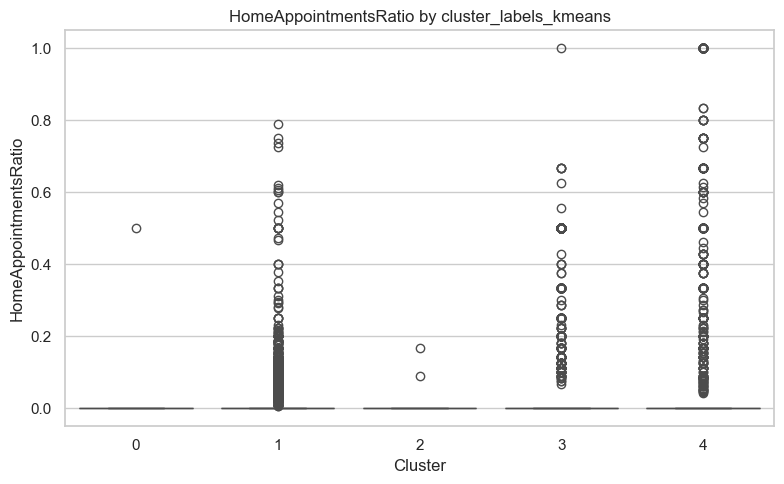

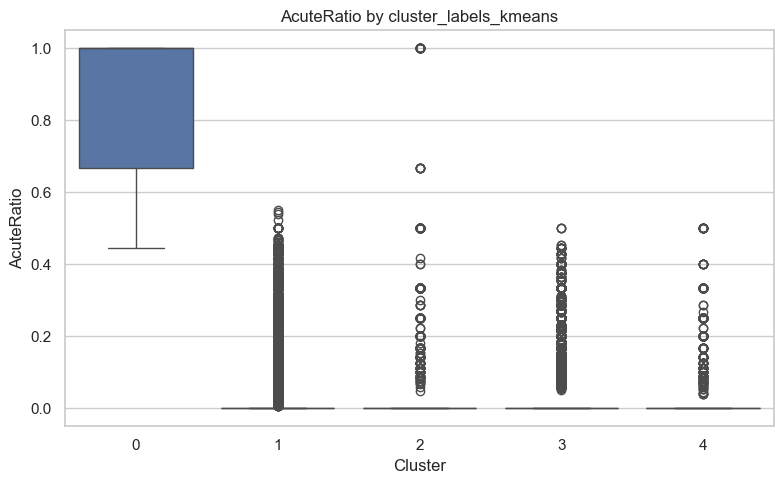

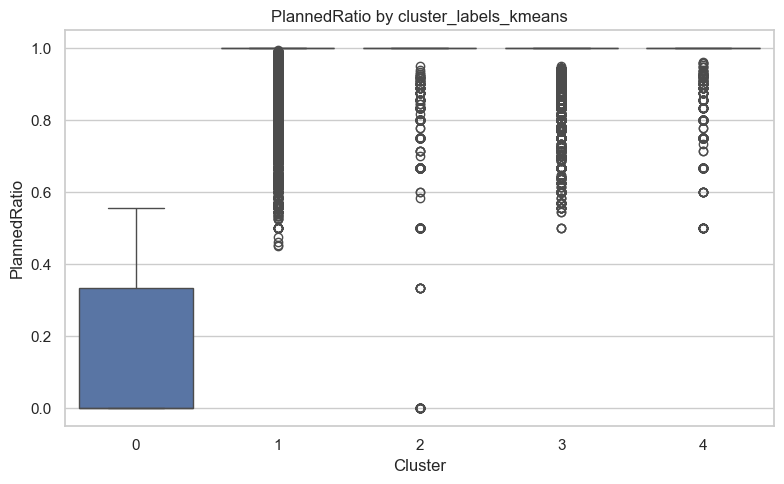

In [13]:
selected_cluster_col = 'cluster_labels_kmeans'
appointment_features = ['PhysicalAppointmentsRatio', 'VirtualAppointmentsRatio', 'HomeAppointmentsRatio', 'AcuteRatio', 'PlannedRatio']
for feature in appointment_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=selected_cluster_col, y=feature, data=df)
    plt.title(f'{feature} by {selected_cluster_col}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

## Age and gender analysis

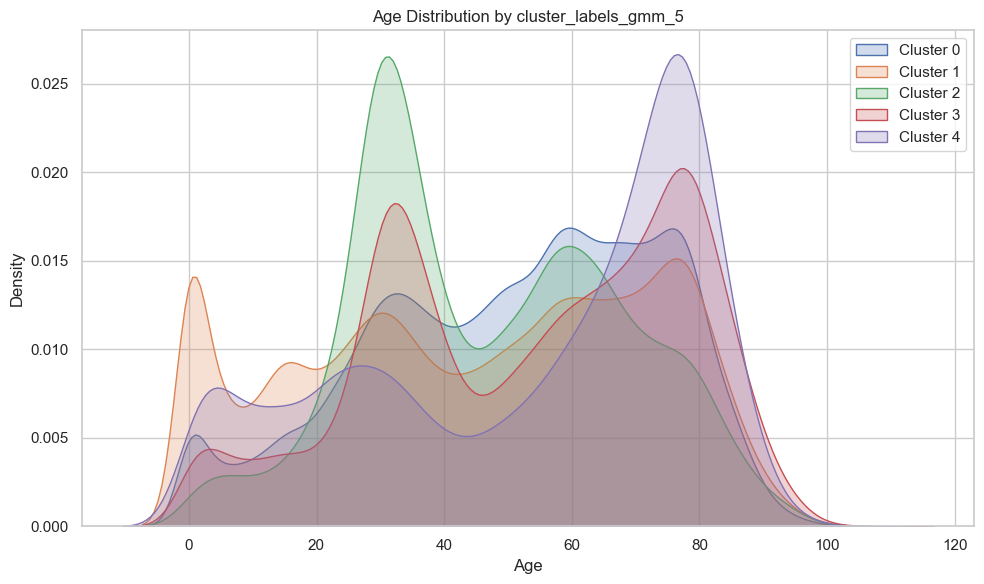

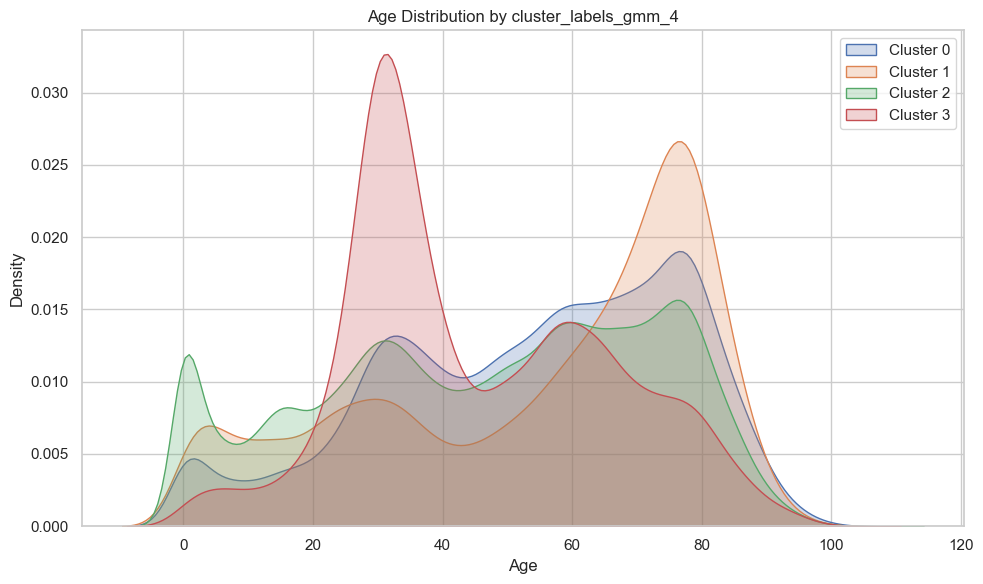

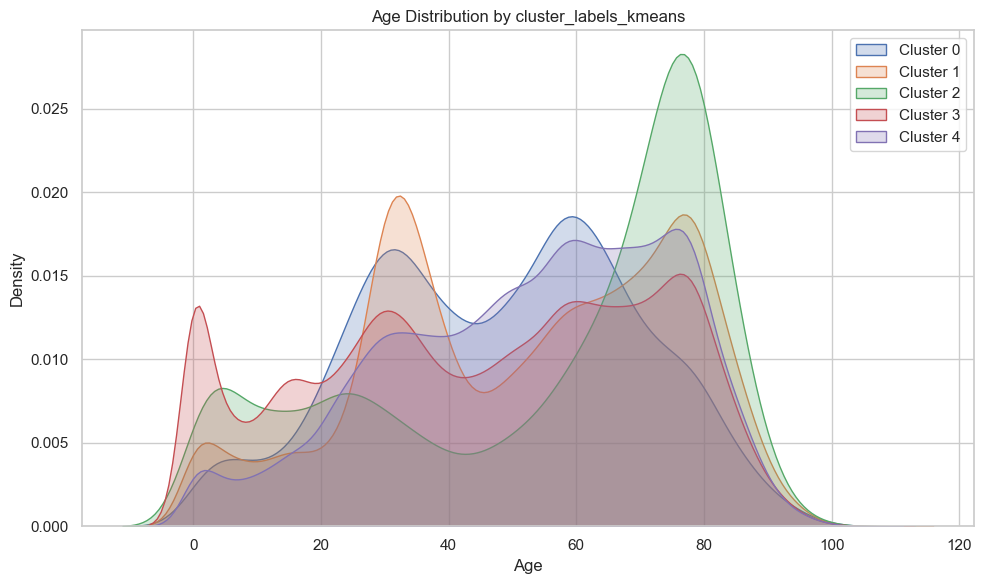

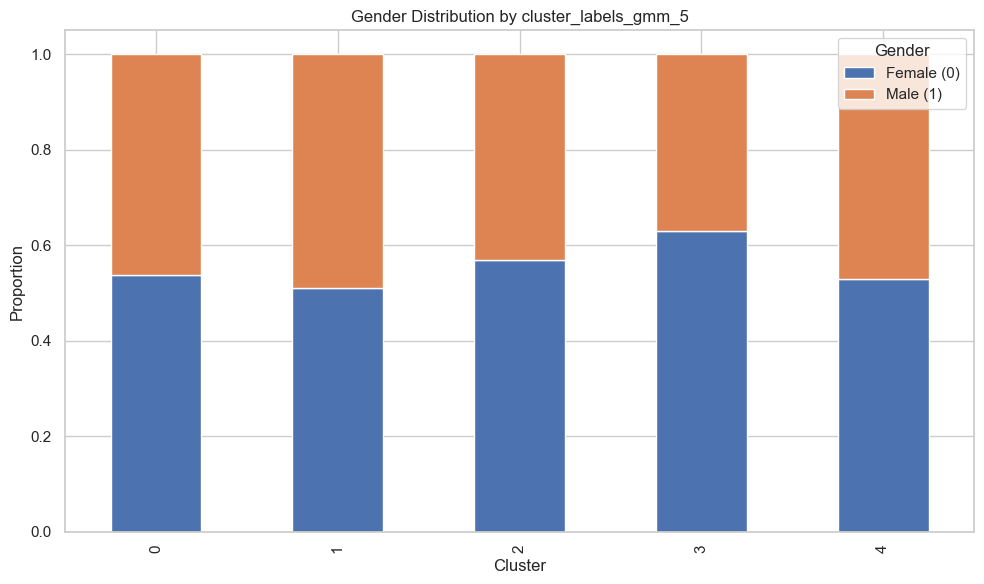

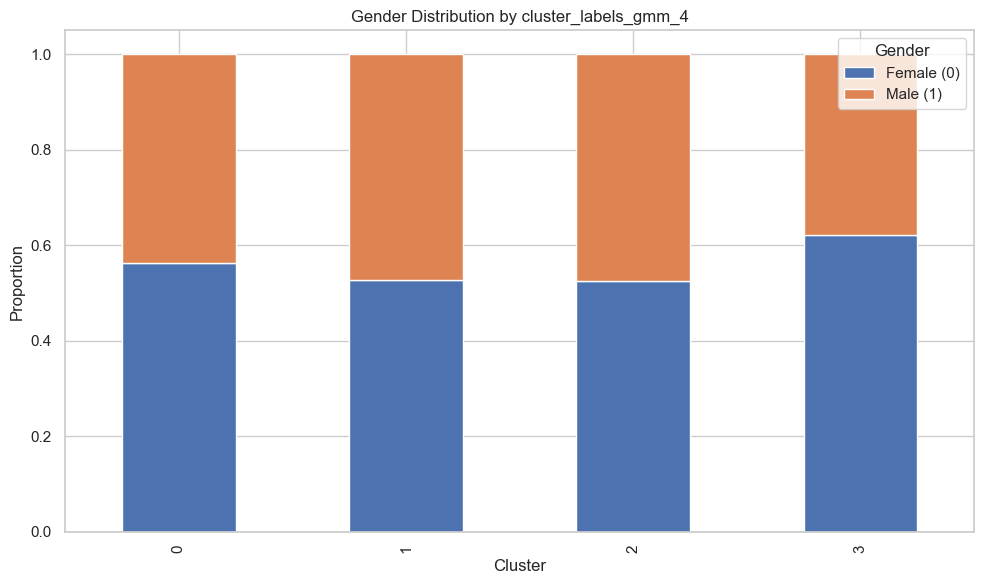

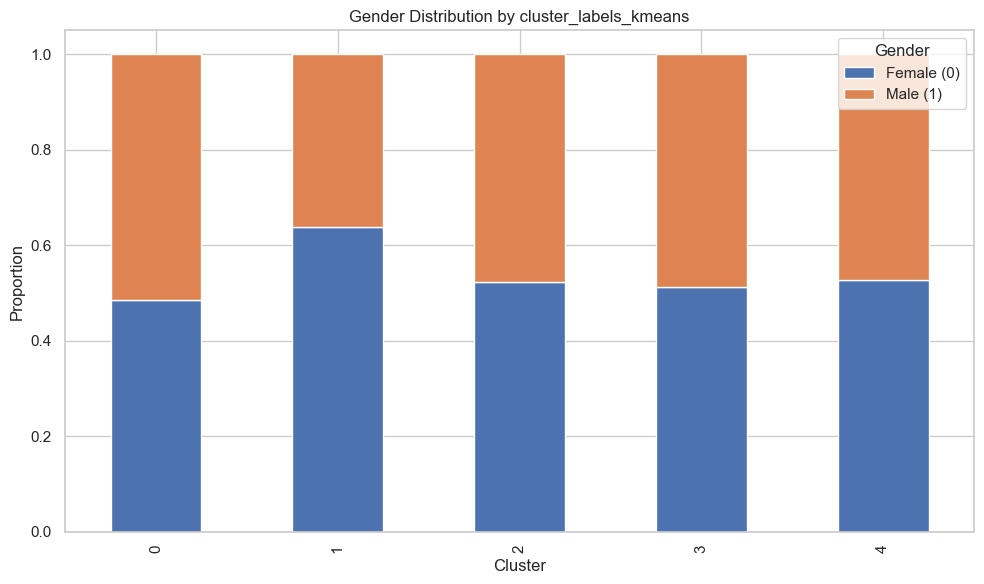

In [15]:
#cluster_columns = ['cluster_labels_gmm_5', 'cluster_labels_gmm_4', 'cluster_labels_kmeans']
# Age distributions
for cluster_col in cluster_columns:
    plt.figure(figsize=(10,6))
    for label in sorted(df[cluster_col].unique()):
        sns.kdeplot(df[df[cluster_col]==label]['Age'], label=f'Cluster {label}', fill=True)
    plt.title(f'Age Distribution by {cluster_col}')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()
# Gender distributions
for cluster_col in cluster_columns:
    gender_cluster = df.groupby([cluster_col, 'Gender']).size().unstack().fillna(0)
    gender_cluster = gender_cluster.div(gender_cluster.sum(axis=1), axis=0)  # Normalize to %
    
    gender_cluster.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(f'Gender Distribution by {cluster_col}')
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')
    plt.legend(title='Gender', labels=['Female (0)', 'Male (1)'])
    plt.tight_layout()
    plt.show()

### Final Cluster Overview Table

| Clustering Method | Cluster | Age Profile | Gender Profile | Main Medical Profile | Notes |
|:------------------|:--------|:------------|:---------------|:---------------------|:------|
| **GMM-5** | 0 | Elderly (~70) | Balanced | Neurology (apoplexy suspicion, epilepsy) | Frail elderly |
|  | 1 | Mixed | Balanced | Hearing loss, child check-ups | Elderly + children |
|  | 2 | Young (~30) | Mostly female | Pregnancy, birth care | Clear pregnancy cluster |
|  | 3 | Mixed | Balanced | Elderly eye disease + birth-related care | Older & some pregnancy |
|  | 4 | Elderly (~75) | Balanced | Age-related cataracts | Clear elderly eye cluster |
| **GMM-4** | 0 | Elderly (~70) | Balanced | Neurology, elderly eye disease | Frail elderly |
|  | 1 | Elderly (~70) | Balanced | Cataracts, ENT problems | Elderly vision & ENT |
|  | 2 | Mixed | Balanced | Hearing loss, follow-up, some pregnancy | Broad mixed cluster |
|  | 3 | Young (~30) | Mostly female | Pregnancy and newborn care | Clear young female cluster |
| **KMeans-5** | 0 | Mixed | Balanced | Eye trauma and infections | Eye emergency cluster |
|  | 1 | Mixed | Balanced | Pregnancy, newborns, elderly eye disease | Mixed pregnancy + elderly |
|  | 2 | Elderly (~75) | Balanced | Cataracts, ENT issues | Clear elderly cluster |
|  | 3 | Mixed | Balanced | Hearing loss, child checkups, follow-ups | Mixed follow-up cluster |
|  | 4 | Elderly (~70) | Balanced | Neurology (apoplexy, epilepsy) | Frail elderly cluster |
lderly cluster